In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re


In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")[['v1', 'v2']]
df.columns = ['label', 'message']


In [3]:
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [5]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       974
           1       1.00      0.79      0.88       141

    accuracy                           0.97      1115
   macro avg       0.99      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[974   0]
 [ 30 111]]
Accuracy: 0.9730941704035875


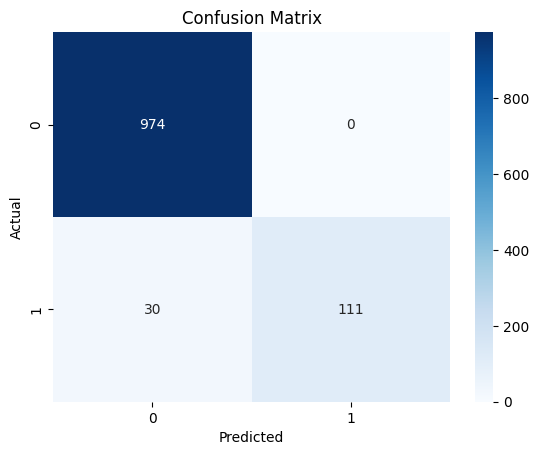

In [7]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
def predict_message(msg):
    msg_tfidf = tfidf.transform([msg])
    prediction = model.predict(msg_tfidf)
    return 'PHISING' if prediction[0] == 1 else 'LEGITIMATE'




In [14]:
# Prediction function
def classify_message(message):
    vect_msg = vectorizer.transform([message])
    prediction = model.predict(vect_msg)[0]
    prob = model.predict_proba(vect_msg)[0][prediction]
    label = "PHISING" if prediction == 1 else "LEGITIMATE"
    return f"{label} (Confidence: {prob:.2f})"

In [9]:
!pip install gradio scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00


In [11]:
import gradio as gr

In [17]:
# Gradio UI
iface = gr.Interface(
    fn=predict_message,
    inputs=gr.Textbox(lines=5, label="Enter your email or message text here"),
    outputs=gr.Textbox(label="Prediction"),
    title="📩 SMS/Email Spam Detector",
    description="Paste your message below and detect whether it's PHISING or LEGITIMATE."
)

# Launch the app
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d84896c375ac22cf37.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [19]:
# Count of ham and spam
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
import plotly.express as px

In [21]:
# Create a simple dataframe for sunburst (total → label)
sunburst_df = pd.DataFrame({
    'parent': ['Total', 'Total'],
    'labels': ['ham', 'spam'],
    'value': [label_counts[label_counts['label'] == 'ham']['count'].values[0],
              label_counts[label_counts['label'] == 'spam']['count'].values[0]]
})

In [22]:
# Add root node
sunburst_df = pd.concat([
    pd.DataFrame({'parent': [''], 'labels': ['Total'], 'value': [sunburst_df['value'].sum()]}),
    sunburst_df
], ignore_index=True)

# Plot sunburst chart
fig = px.sunburst(
    sunburst_df,
    names='labels',
    parents='parent',
    values='value',
    title='SMS Spam Dataset Distribution (Sunburst View)',
    color='labels',
    color_discrete_map={'ham': 'green', 'spam': 'red', 'Total': 'lightblue'}
)
fig.show()

<ipython-input-23-56cc5fc48e68>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




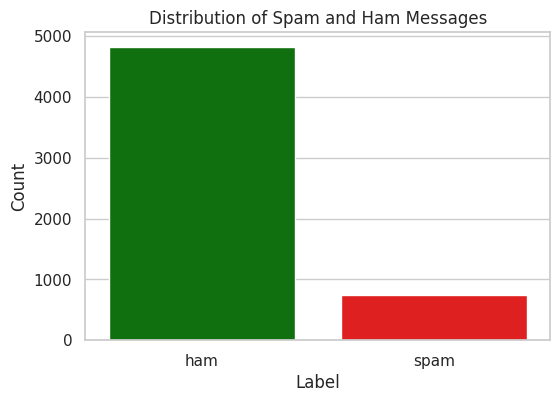

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette={'ham': 'green', 'spam': 'red'})
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


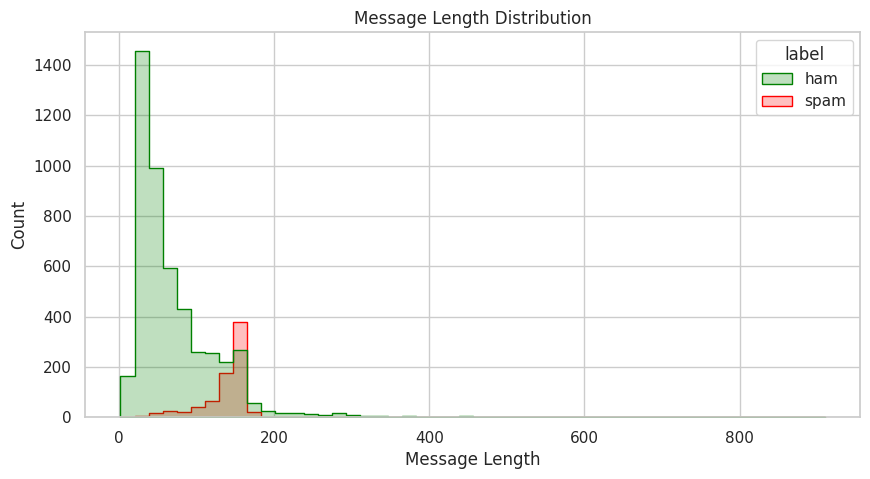

In [24]:
df['length'] = df['message'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='length', hue='label', element='step', bins=50, palette={'ham': 'green', 'spam': 'red'})
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()


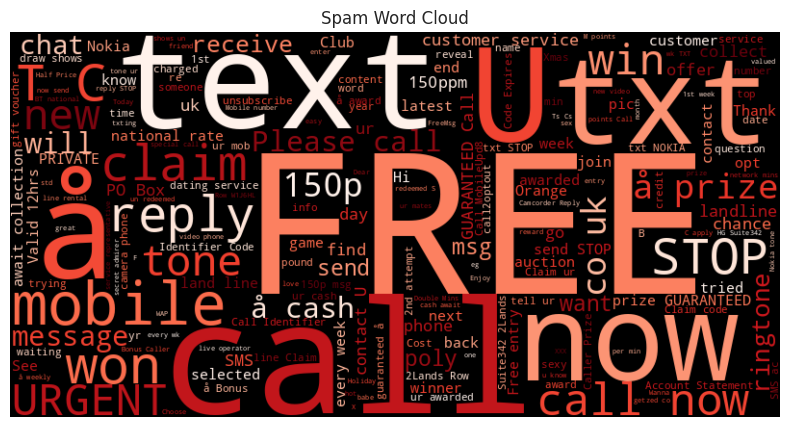

In [25]:
from wordcloud import WordCloud

spam_words = ' '.join(df[df['label'] == 'spam']['message'].tolist())

spam_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_words)

plt.figure(figsize=(10,5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Word Cloud')
plt.show()


<ipython-input-26-06cd81d9ac3c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




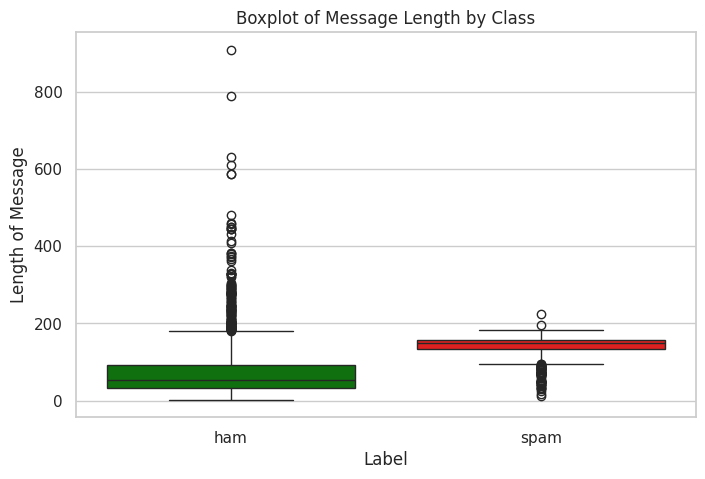

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='label', y='length', palette={'ham': 'green', 'spam': 'red'})
plt.title('Boxplot of Message Length by Class')
plt.xlabel('Label')
plt.ylabel('Length of Message')
plt.show()


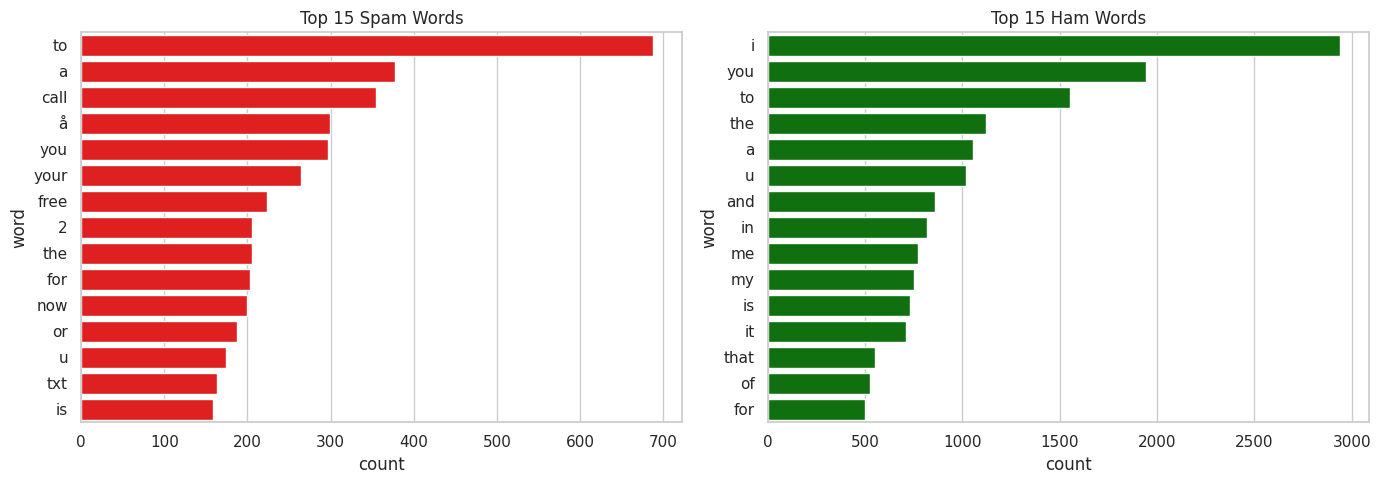

In [27]:
from collections import Counter
import re

# Simple tokenization
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

spam_tokens = tokenize(' '.join(df[df['label']=='spam']['message']))
ham_tokens = tokenize(' '.join(df[df['label']=='ham']['message']))

spam_freq = Counter(spam_tokens).most_common(15)
ham_freq = Counter(ham_tokens).most_common(15)

# Convert to DataFrame
spam_df = pd.DataFrame(spam_freq, columns=['word', 'count'])
ham_df = pd.DataFrame(ham_freq, columns=['word', 'count'])

# Plotting
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
sns.barplot(data=spam_df, x='count', y='word', color='red')
plt.title('Top 15 Spam Words')

plt.subplot(1, 2, 2)
sns.barplot(data=ham_df, x='count', y='word', color='green')
plt.title('Top 15 Ham Words')

plt.tight_layout()
plt.show()
